# Propriétés d'une population fictive de 130 personnes: analyse univariée

Version du 24 avril 2022

130 individus, cinq caractères: age, personnes dans le même foyer, fréquence de lecture du journal, orientation politique, revenu mensuel




## Importer les librairies nécessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Références bibliographiques

Référence:

* [Statistique descriptive unidimensionnelle](http://wikistat.fr/pdf/st-l-des-uni.pdf) (Site Wikistat)


Compléments:

* Hamon : Hamon Philippe, Hamon Agnès, et Jégou Nicolas, _Statistique descriptive. Cours et exercices corrigés_, Rennes, PUR, 2008.
* Saly : Saly Pierre, _Méthodes statistiques descriptives pour les historiens_, Paris, A. Colin, 1991.
* [Statology - Tutorials](https://www.statology.org/tutorials/)



## Explorer les observations

* Regrouper et inspecter : la distribution
* Afficher et analyser : les graphiques

In [2]:
### Lire le fichier corrigé manuellement – ne pas effacer !

path = 'data/observations_mod.csv'

observations_mod = pd.read_csv(path)
observations_mod.set_index('id', inplace=True)
observations_mod.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel
id,,,,,
1,44,3,de temps en temps,droite,9660
2,45,1,tous les jours,droite,7364
3,54,3,de temps en temps,droite,8947
4,86,2,tous les jours,populiste,6317
5,77,2,tous les jours,gauche,6511


In [3]:
## Nombre de lignes et de colonnes du tableau
observations_mod.shape

(130, 5)

In [4]:
### Nombre de lignes du tableau
obs = observations_mod
#obs = observations # 900
len(obs)

130

### Afficher et inspecter les données: âge

In [5]:
### On crée un variable qui contient seulement la colonne
#  c'est-à-dire la pandas.Series, la série ou liste de données 'âge'
age = obs['age']
type(age), age.head()

(pandas.core.series.Series,
 id
 1    44
 2    45
 3    54
 4    86
 5    77
 Name: age, dtype: int64)

<AxesSubplot:xlabel='id'>

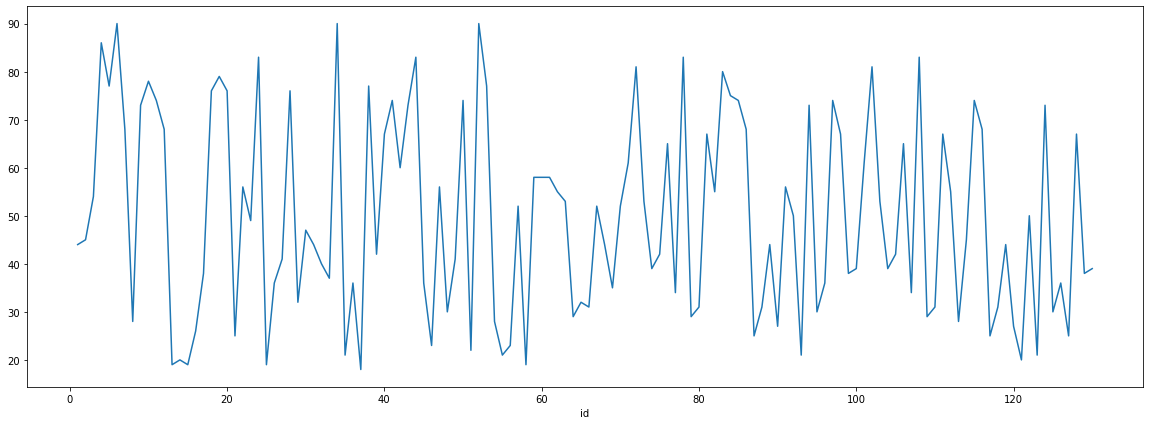

In [6]:
### Représentation en mode ligne à éviter dans ce cas:
#  des surfaces sans sens
age.plot(figsize=(20,7))

<AxesSubplot:xlabel='id'>

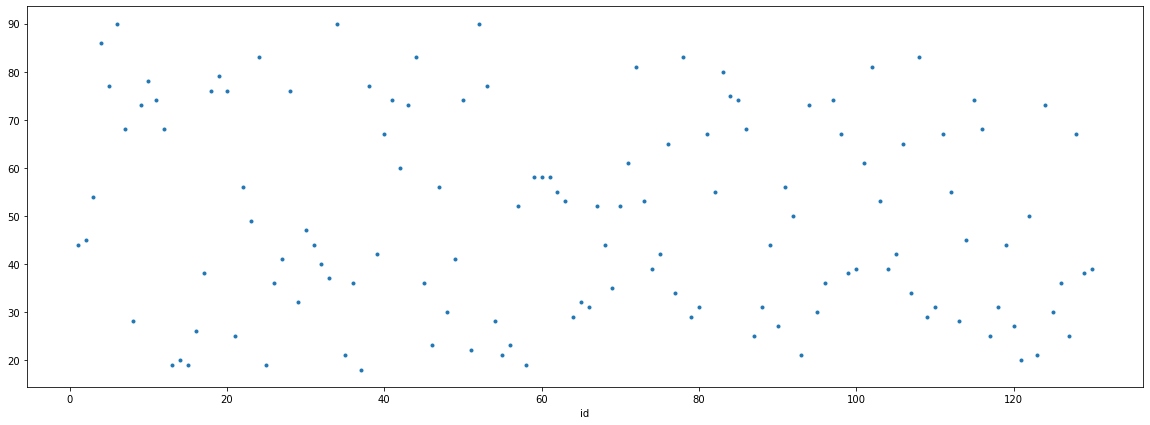

In [7]:
### Les individus en abscisses avec leur age en ordonnées:
#  type de représentation à éviter dans ce cas
age.plot(style='.',figsize=(20,7))

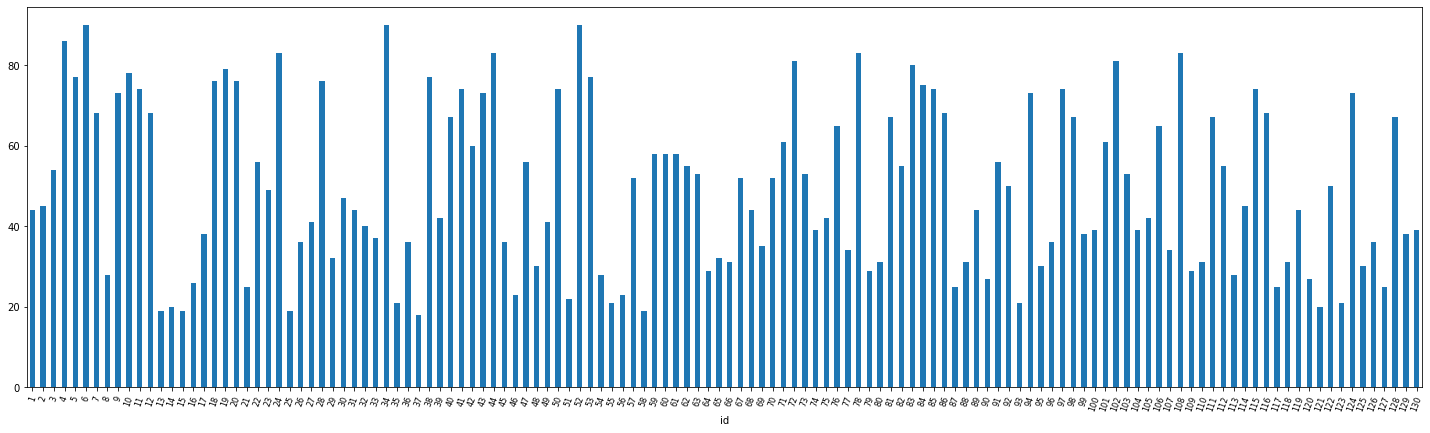

In [8]:
### AVec le diagramme à barres on a une 'image' plus parlante
# de l'age des individus mais illisible sans tri — il s'agira donc de trier
ax = age.plot.bar(x='lab', y='val', rot=70, figsize=(25,7))
ax.tick_params(axis = 'x', labelsize = 8)

In [9]:
### Tri ascendant des valeurs
#  Pour le tri déscendant, 
#  mettre en argument de la fonction sort_values: ascending=False
s_age = age.sort_values() 
s_age.head()

id
37    18
25    19
15    19
13    19
58    19
Name: age, dtype: int64

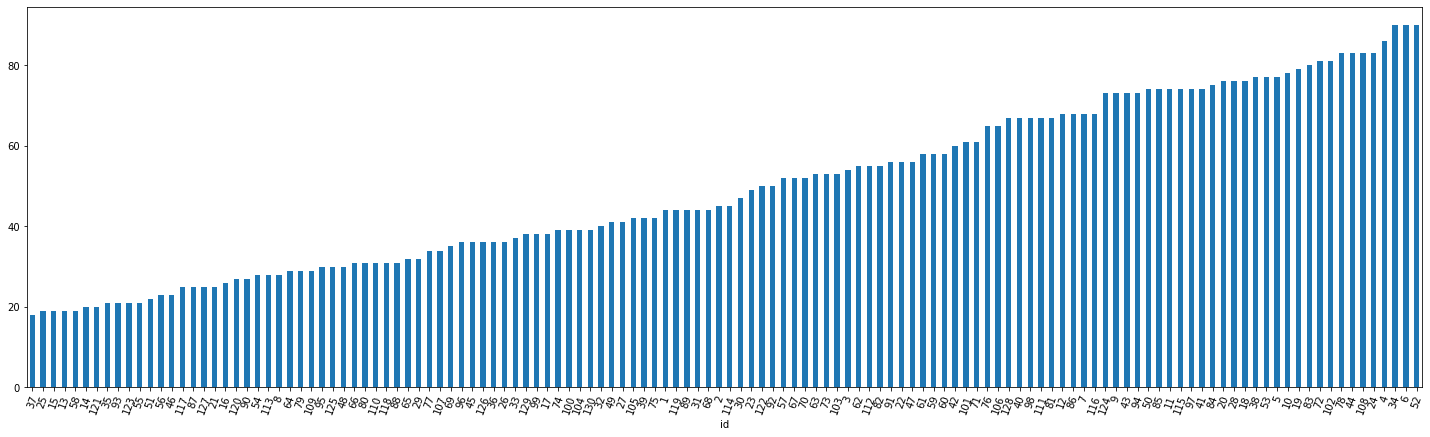

In [10]:
### Cette visualisation donne une impression de la croissance des âges
x = s_age.plot.bar(x='lab', y='val', rot=70, figsize=(25,7))
ax.tick_params(axis = 'x', labelsize = 8)

### Effectifs par valeur

Âge est traité comme variable quantitative discrète. C'est un cas limite car, étant donné la quantité de valeurs différentes, on pourrait aussi établir des classes et traiter l'âge comme variable quantitative continue.

À noter également que renseigner l'âge en années revient à créer des classes, les années en tant que classes, car l'âge peut aussi être mesurée en jours, ce qui est plus précis mais généralement moins significatif, du moins pour les humains.



In [11]:
### Regrouper par âge et compter les individus par valeur
cs_age = s_age.groupby(s_age).count()
print(type(cs_age))
cs_age.head()

<class 'pandas.core.series.Series'>


age
18    1
19    4
20    2
21    4
22    1
Name: age, dtype: int64

In [12]:
### Transformer la serie en dataFrame
df_cs_age = pd.DataFrame(cs_age)
print(type(df_cs_age))
df_cs_age.head()

<class 'pandas.core.frame.DataFrame'>


,age
age,
18,1
19,4
20,2
21,4
22,1


In [13]:
### Renommer la colonne
df_cs_age.columns=['effectif']
df_cs_age.head(), df_cs_age.index[:5]

(     effectif
 age          
 18          1
 19          4
 20          2
 21          4
 22          1,
 Int64Index([18, 19, 20, 21, 22], dtype='int64', name='age'))

In [14]:
### Ajouter les effectifs cumulés
df_cs_age['effectif_cumule'] = df_cs_age['effectif'].cumsum()
df_cs_age.head()

,effectif,effectif_cumule
age,,
18,1,1
19,4,5
20,2,7
21,4,11
22,1,12


### Fréquence et fréquence cumulée

In [15]:
### Calculer et ajouter la fréquence
#  en tant que proportion entre l'effectif de la valeur et l'effectif total

df_cs_age['frequence'] = (100 * df_cs_age['effectif'] \
                                   / df_cs_age['effectif'].sum()).round(2)
df_cs_age.head()

,effectif,effectif_cumule,frequence
age,,,
18,1,1,0.77
19,4,5,3.08
20,2,7,1.54
21,4,11,3.08
22,1,12,0.77


In [16]:
### Ajouter la fréquence cumulée
df_cs_age['frequence_cumulee'] = (100 * df_cs_age['effectif_cumule'] \
                                / df_cs_age['effectif'].sum()).round(2)
df_cs_age.head()

,effectif,effectif_cumule,frequence,frequence_cumulee
age,,,,
18,1,1,0.77,0.77
19,4,5,3.08,3.85
20,2,7,1.54,5.38
21,4,11,3.08,8.46
22,1,12,0.77,9.23


### Représentations graphiques

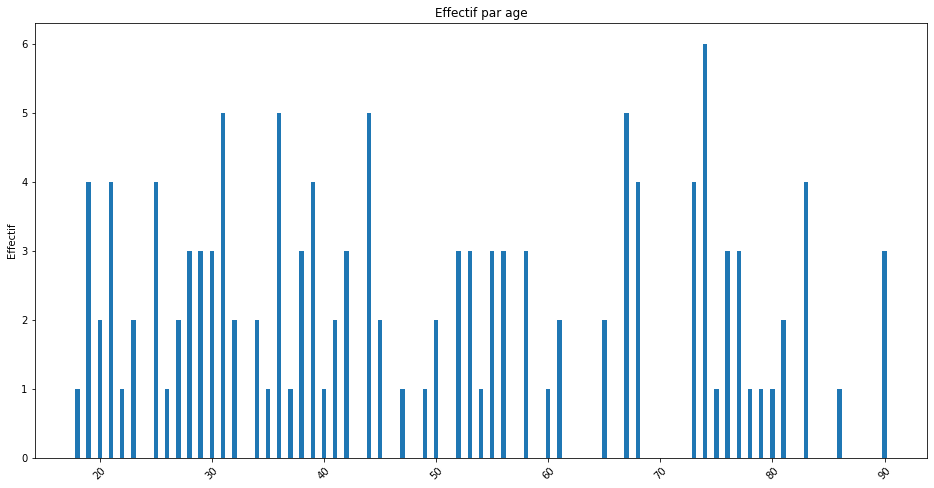

In [17]:
# Distribution des effectifs par age

objects = df_cs_age.index
eff = df_cs_age['effectif']

p1 = plt.bar(objects, eff, width=0.4)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title('Effectif par age')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


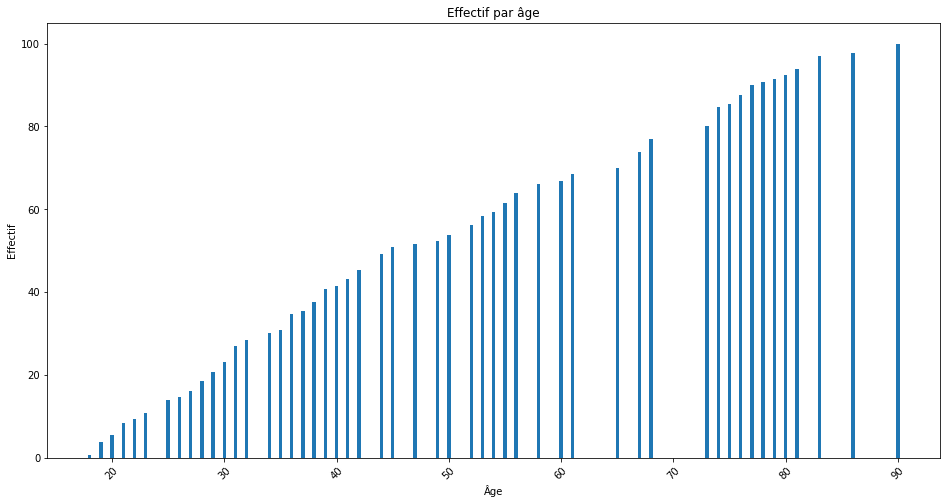

In [18]:
# Effectifs cumulés par âge

objects = df_cs_age.index
#eff = df_cs_age['effectif_cumule']
eff = df_cs_age['frequence_cumulee']



p1 = plt.bar(objects, eff, width=0.3)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.xlabel('Âge')
plt.title('Effectif par âge')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


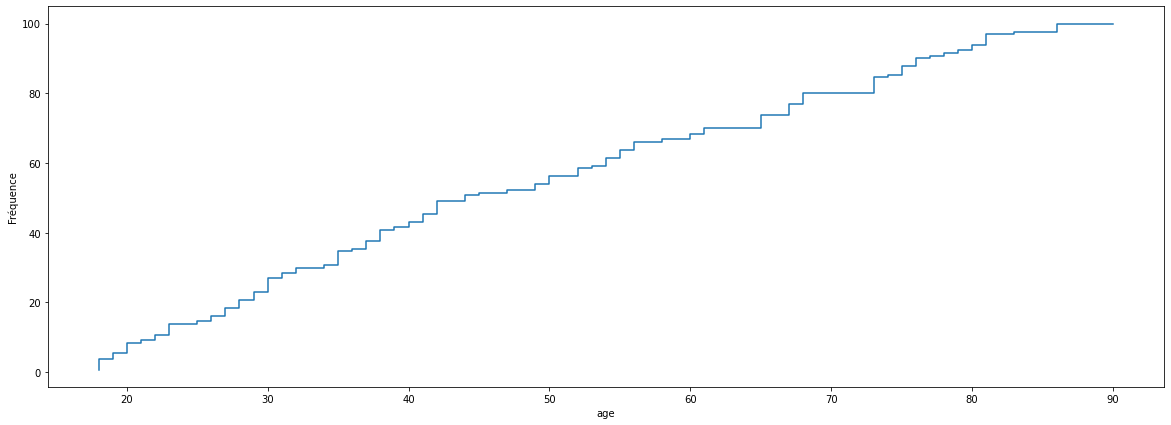

In [19]:
### Diagramme cumulatif : fréquences cumulées
#  On observe que la médiane est autour de 45 ans,
#  i.e. que la moitié de la population a moins de 45 ans, le reste plus 
plt.ylabel('Fréquence')
df_cs_age['frequence_cumulee'].plot(figsize=(20,7), drawstyle='steps') #  style='o--',
plt.draw()

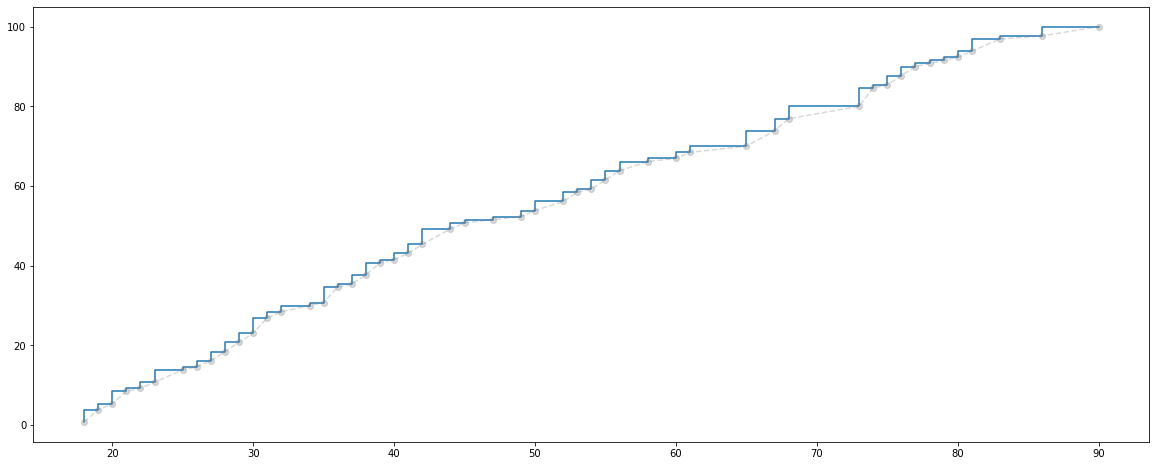

In [20]:
### Deux représentations graphiques différentes pour la même croissance
# Documentation
#   https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py
x = df_cs_age.index
y = df_cs_age['frequence_cumulee']
fig = plt.figure(figsize=[20,8])
### Commenter l'une des deux lignes suivantes pour voire la différence
plt.step(x, y, label='pre (default)')
plt.plot(x, y, 'o--', color='grey', alpha=0.3)
plt.show()

## Paramètres de centralité et de dispersion

In [21]:
### Cette méthode d'une série fournit les caractéristiques
#  de tendance centrale et de dispersion
age.describe()

count    130.000000
mean      49.553846
std       20.757015
min       18.000000
25%       31.000000
50%       45.000000
75%       68.000000
max       90.000000
Name: age, dtype: float64

In [22]:
### La valeur la plus fréquente
age.mode()[0]

74

In [23]:
### Quel effectif a-t-ele ?
len(age[age == 74])

6

<AxesSubplot:>

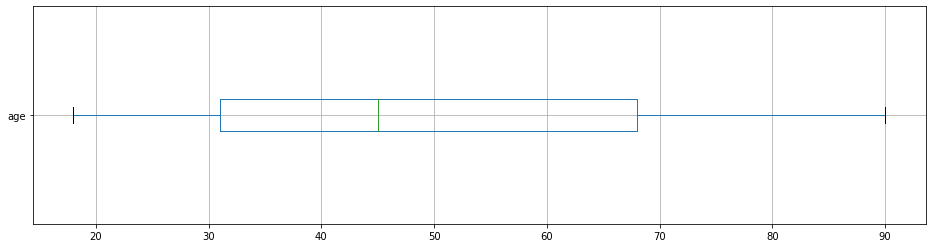

In [24]:
### Diagramme-boîte ou boîte-à-moustache pour représenter la dispersion
# Ligne centrale = la médiane. Le box est entre 1er et 3e quartile
# La moitié de la population se situe entre 31 et 68 ans
#  Noter qu'on utilise le DataFrame car cet objet dispose d'une méthode boxplot
# ce qui n'est pas le cas d'une série (pd.Series)
obs.boxplot(column=['age'], vert=False, figsize=(16,4))

In [1]:
### Violinplot : rend visible la différente densité de la distribution
#  https://mode.com/blog/violin-plot-examples/
#  https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot

sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(30, 8)})


a = obs["age"]

ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont postulées
ax.set_xlim(left=min(a), right=max(a))



NameError: name 'sns' is not defined

### Histogramme

In [26]:
### Créer une copie indépendante du DataFrame (attention aux copies de variables qui sont seulement des alias) 
# et coder les années de naissance en relation avec un découpage significatif au point de vue heuristique, et modifiable si besion
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

generations = [18, 26, 36, 46, 56, 66, 91]
c_obs = obs.copy(deep=True)
c_obs['generation'] = pd.cut(c_obs['age'], generations, right=False)
# Inspection
c_obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel,generation
id,,,,,,
1,44,3,de temps en temps,droite,9660,"[36, 46)"
2,45,1,tous les jours,droite,7364,"[36, 46)"
3,54,3,de temps en temps,droite,8947,"[46, 56)"
4,86,2,tous les jours,populiste,6317,"[66, 91)"
5,77,2,tous les jours,gauche,6511,"[66, 91)"


In [27]:
### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a enlevé une unité afin d'avoir des valeurs incluses

c_obs['generation'] = c_obs['generation'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))
c_obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel,generation
id,,,,,,
1,44,3,de temps en temps,droite,9660,36-45
2,45,1,tous les jours,droite,7364,36-45
3,54,3,de temps en temps,droite,8947,46-55
4,86,2,tous les jours,populiste,6317,66-90
5,77,2,tous les jours,gauche,6511,66-90


In [28]:
### Alternative : regrouper et compter par génération avec la fonction Pandas 'groupby' (équivalente à la précédente)
gb_generation = pd.DataFrame(c_obs.groupby('generation').size())
gb_generation.columns = ['effectif']
gb_generation

,effectif
generation,
18-25,18
26-35,22
36-45,26
46-55,14
56-65,11
66-90,39


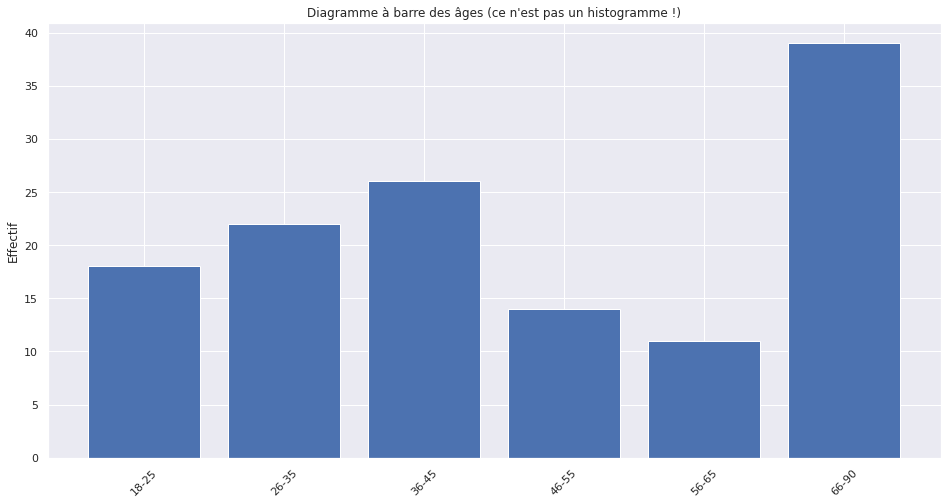

In [29]:
### Diagramme à barre, non adapté et trompeur: ce n'est pas un vrai histogramme
# Attention aux différentes étendues des ages, les densités des tranches sont différentes

objects = [l for l in gb_generation.index]
eff = [l for l in gb_generation['effectif']]

p1 = plt.bar(objects, eff)

plt.ylabel('Effectif')
plt.title("Diagramme à barre des âges (ce n'est pas un histogramme !)")
plt.gcf().set_size_inches(16, 8)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
# plt.savefig('exported_pictures/effectifs_annees_reference_par_periode.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


In [30]:
gb_generation = gb_generation.reset_index()
gb_generation

,generation,effectif
0,18-25,18
1,26-35,22
2,36-45,26
3,46-55,14
4,56-65,11
5,66-90,39


In [31]:
### L'histogramme est basé sur la densité de différentes tranches
#  Cette fonction calcule la densité des tranches
def calculer_densite(ligne):
    i = ligne['generation'].split('-')
    # print(i)
    ampl = int(i[1])-int(i[0])
    # print(ampl)
    d = round(ligne['frequence']/ampl,4)
    return(d)

In [32]:
### Séparer et préparer les différentes valeurs
gb_generation['frequence'] = (gb_generation['effectif'] \
                                   / gb_generation['effectif'].sum()).round(4)
gb_generation['densité'] = gb_generation.apply(calculer_densite, axis=1)
gb_generation['start'] = gb_generation.apply(lambda x : int(x['generation'].split('-')[0]), axis=1)
gb_generation['width'] = gb_generation.apply(lambda x : int(x['generation'].split('-')[1])-int(x['generation'].split('-')[0]), axis=1)
gb_generation

,generation,effectif,frequence,densité,start,width
0,18-25,18,0.1385,0.0198,18,7
1,26-35,22,0.1692,0.0188,26,9
2,36-45,26,0.2000,0.0222,36,9
3,46-55,14,0.1077,0.0120,46,9
4,56-65,11,0.0846,0.0094,56,9
5,66-90,39,0.3000,0.0125,66,24


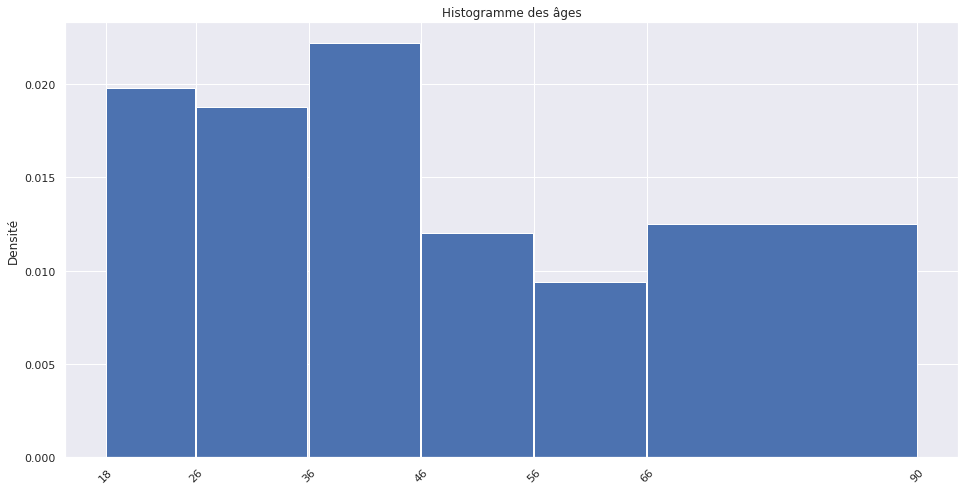

In [33]:
### Histogramme
# La hauteur des barres, en abscisses, représente la densité non l'effectif, 
# l'effectif est représenté par l'aire: à effectif égale aire égale
fig,ax = plt.subplots(1,1)

objects = [l for l in gb_generation['start']]
eff = [l for l in gb_generation['densité']]
width = [l+0.9 if l < 10 else l for l in gb_generation['width']]

p1 = plt.bar(objects, eff, width = width, align="edge")
ax.set_xticks([18, 26, 36, 46, 56, 66, 90])
plt.ylabel('Densité')
plt.title('Histogramme des âges')
plt.gcf().set_size_inches(16, 8)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
# plt.savefig('exported_pictures/effectifs_annees_reference_par_periode.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


## Exploration des revenus

Variable quantitative continue

On applique une méthodologie semblable à la précédente avec quelques différentes

In [34]:
revenu = obs['revenu_mensuel']
revenu.head()

id
1    9660
2    7364
3    8947
4    6317
5    6511
Name: revenu_mensuel, dtype: int64

In [35]:
s_revenu = revenu.sort_values()
s_revenu.head()

id
37     1400
25     1500
117    2000
55     2135
124    2500
Name: revenu_mensuel, dtype: int64

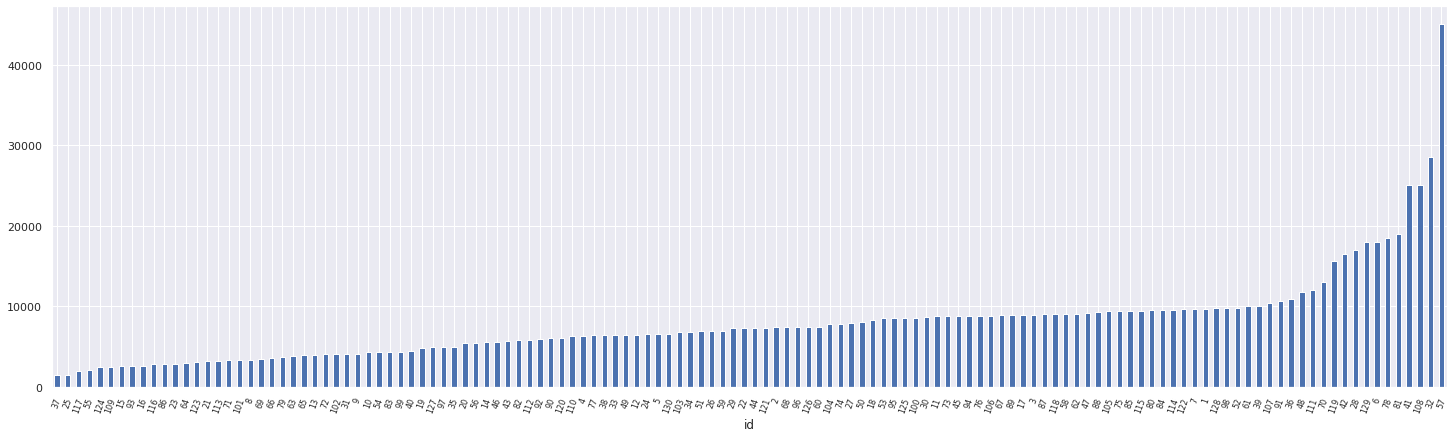

In [ ]:
### Affichage ds revenus triés
ax = s_revenu.plot.bar(x='lab', y='val', rot=70, figsize=(25,7))
ax.tick_params(axis = 'x', labelsize = 8)

In [37]:
### Centralité et dispersion
revenu.describe().round(0)

count      130.0
mean      7985.0
std       5605.0
min       1400.0
25%       4399.0
50%       7276.0
75%       9236.0
max      45000.0
Name: revenu_mensuel, dtype: float64

(1400.0, 45000.0)

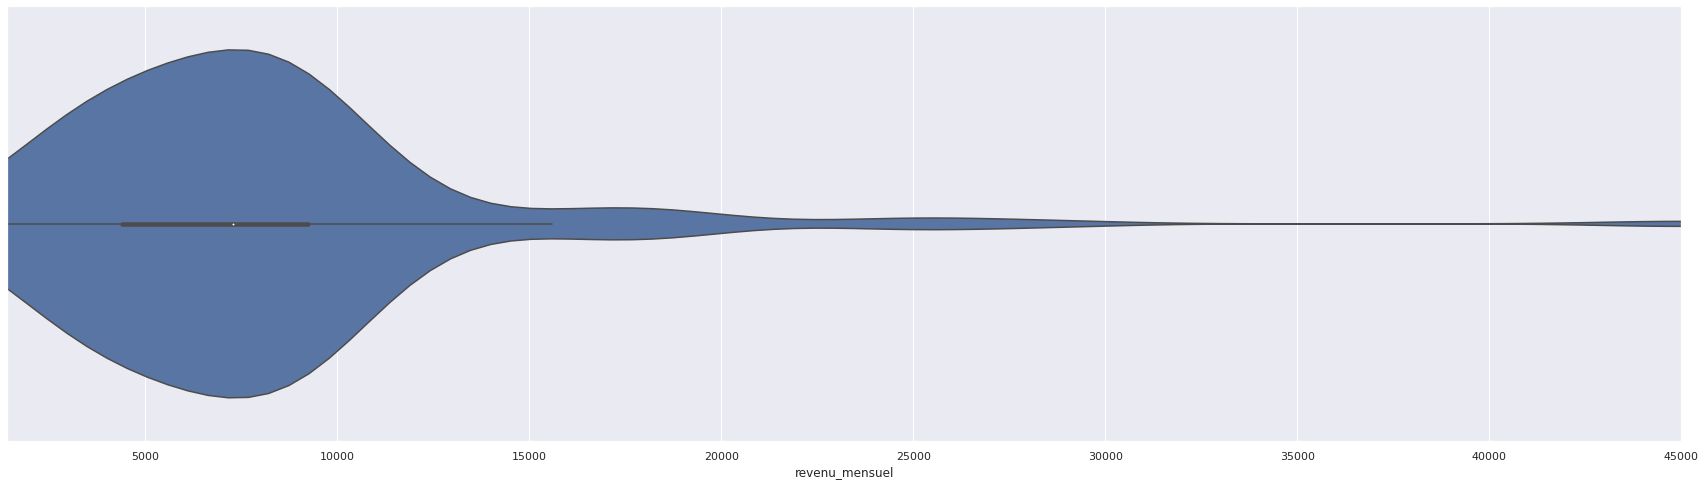

In [38]:
### Le violin plot montre bien où se situent les revenus les plus fréquents

sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(30, 8)})

a = obs["revenu_mensuel"]

ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont postulées
ax.set_xlim(left=min(a), right=max(a))



In [39]:
### Créer quatre classes de revenus en utilisant les quartiles
# Chaque classe contient ainsi un quart de la population
df_s_revenu = pd.DataFrame(s_revenu)
df_s_revenu['qcut'] = pd.qcut(df_s_revenu['revenu_mensuel'], 4)
df_s_revenu

,revenu_mensuel,qcut
id,,
37,1400,"(1399.999, 4399.0]"
25,1500,"(1399.999, 4399.0]"
117,2000,"(1399.999, 4399.0]"
55,2135,"(1399.999, 4399.0]"
124,2500,"(1399.999, 4399.0]"
...,...,...
81,19000,"(9236.25, 45000.0]"
41,25000,"(9236.25, 45000.0]"
108,25000,"(9236.25, 45000.0]"


In [40]:
gbdf_s_revenu = df_s_revenu.groupby(by='qcut').size()
gbdf_s_revenu = gbdf_s_revenu.reset_index()
gbdf_s_revenu.columns = ['qcut', 'effectif']
gbdf_s_revenu

,qcut,effectif
0,"(1399.999, 4399.0]",33
1,"(4399.0, 7275.5]",32
2,"(7275.5, 9236.25]",32
3,"(9236.25, 45000.0]",33


In [41]:
def calculer_densite_width(ligne):
    x = ligne['qcut']
    ampl = int(x.right) - int(x.left)
    right = int(x.right)
    left = int(x.left)
    d = round(ligne['frequence']/ampl,8)
    return([d, left, right, ampl])

In [42]:
gbdf_s_revenu['frequence'] = (gbdf_s_revenu['effectif'] \
                / gbdf_s_revenu['effectif'].sum()).round(6)
gbdf_s_revenu

,qcut,effectif,frequence
0,"(1399.999, 4399.0]",33,0.253846
1,"(4399.0, 7275.5]",32,0.246154
2,"(7275.5, 9236.25]",32,0.246154
3,"(9236.25, 45000.0]",33,0.253846


In [43]:
gbdf_s_revenu['dlrampl'] = gbdf_s_revenu.apply(calculer_densite_width, axis=1)
gbdf_s_revenu

,qcut,effectif,frequence,dlrampl
0,"(1399.999, 4399.0]",33,0.253846,"[8.462e-05, 1399, 4399, 3000]"
1,"(4399.0, 7275.5]",32,0.246154,"[8.559e-05, 4399, 7275, 2876]"
2,"(7275.5, 9236.25]",32,0.246154,"[0.00012552, 7275, 9236, 1961]"
3,"(9236.25, 45000.0]",33,0.253846,"[7.1e-06, 9236, 45000, 35764]"


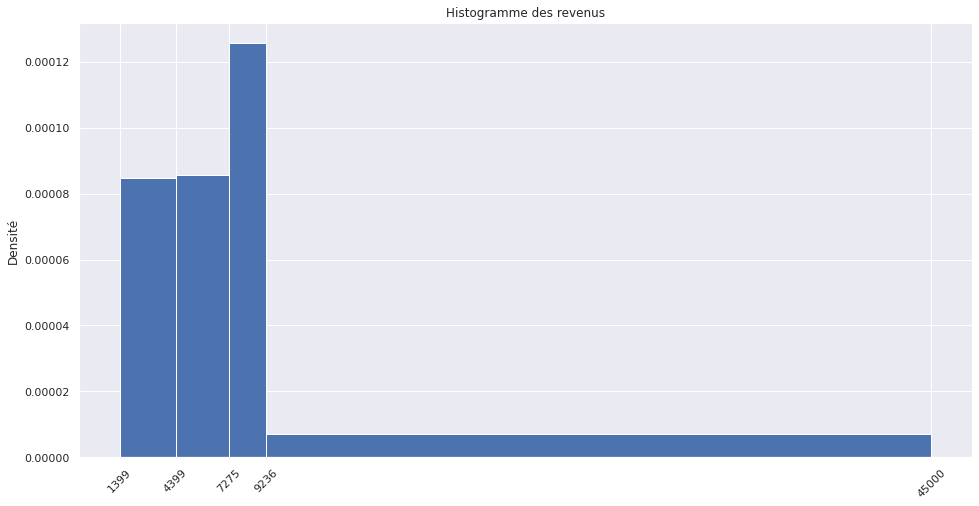

In [44]:
### Histogramme
# La hauteur des barres, en ordonnées, représente la densité non l'effectif, 
# l'effectif est représenté par l'aire
##  Noter le nombre élevé de revenus autour de 8000 CHF, 
## en revanche peu d'individus dans la classe avec les plus haut revenus

fig,ax = plt.subplots(1,1)

objects = [l[1] for l in gbdf_s_revenu['dlrampl']]
eff = [l[0] for l in gbdf_s_revenu['dlrampl']]
width = [l[3]  for l in gbdf_s_revenu['dlrampl']]


p1 = plt.bar(objects, eff, width = width, align="edge")
ax.set_xticks(objects + [[l[2] for l in gbdf_s_revenu['dlrampl']][-1]])
plt.ylabel('Densité')
plt.title('Histogramme des revenus')
plt.gcf().set_size_inches(16, 8)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
# plt.savefig('exported_pictures/effectifs_annees_reference_par_periode.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


[118.   8.   3.   1.]


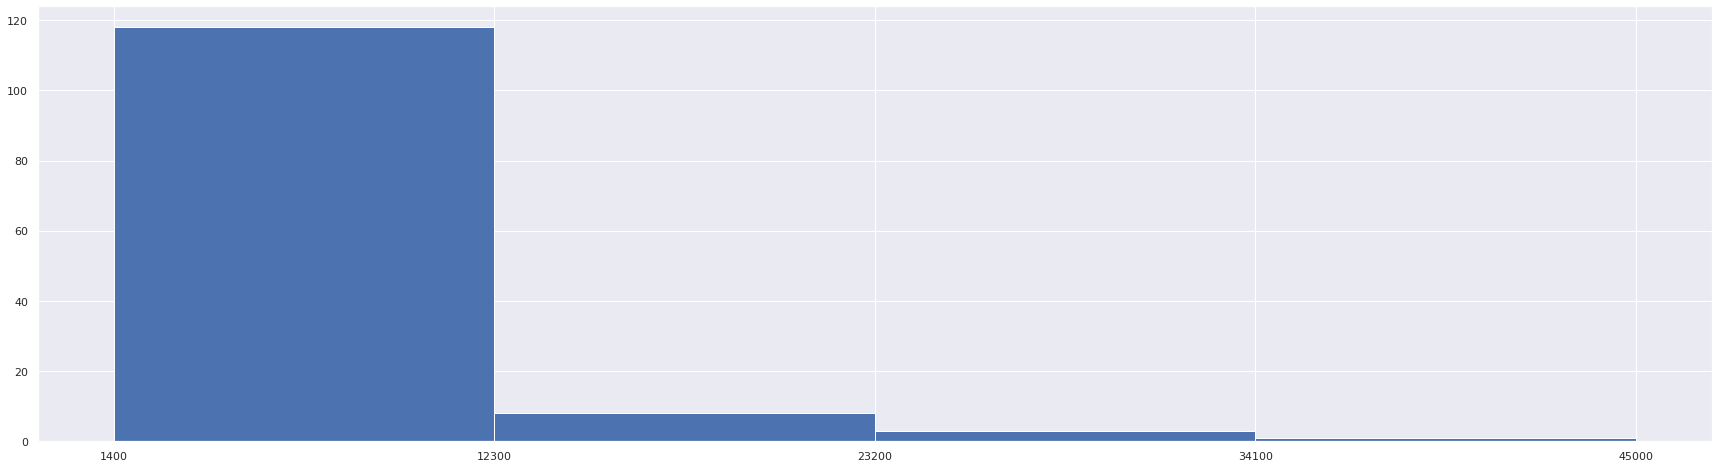

In [45]:
### Le graphique par défaut de Matplotlib, 
#  ne met pas en évidence la spécificité de la distribution,
#  i.e. le nombre élevé de revenus autour de 8000 CHF
# Ceci dépend d'un (et illustre un) découpage des classes non pertinent
n, bins, patches = plt.hist(s_revenu, bins=4, density=False)
print(n)
plt.xticks(bins)
plt.show()

## Regrouper et analyser les variables qualitatives

### Parti politique

In [46]:
### Regrouper et compter
gb_parti = obs.groupby('parti').size()
sgb_parti = gb_parti.sort_values(ascending = True)
sgb_parti

parti
droite        18
gauche        23
centre        25
populiste     30
écologiste    34
dtype: int64

In [47]:
### Modification du dataframe
df_partis = pd.DataFrame(sgb_parti, columns=['effectif'])
df_partis.reset_index(inplace=True)
df_partis

,parti,effectif
0,droite,18
1,gauche,23
2,centre,25
3,populiste,30
4,écologiste,34


In [48]:
### Le code attribué manuellement permet de représenter l'émicycle parlementaire lors du tri
df_partis['code_parti'] = [4,2,3,5,1]
df_partis

,parti,effectif,code_parti
0,droite,18,4
1,gauche,23,2
2,centre,25,3
3,populiste,30,5
4,écologiste,34,1


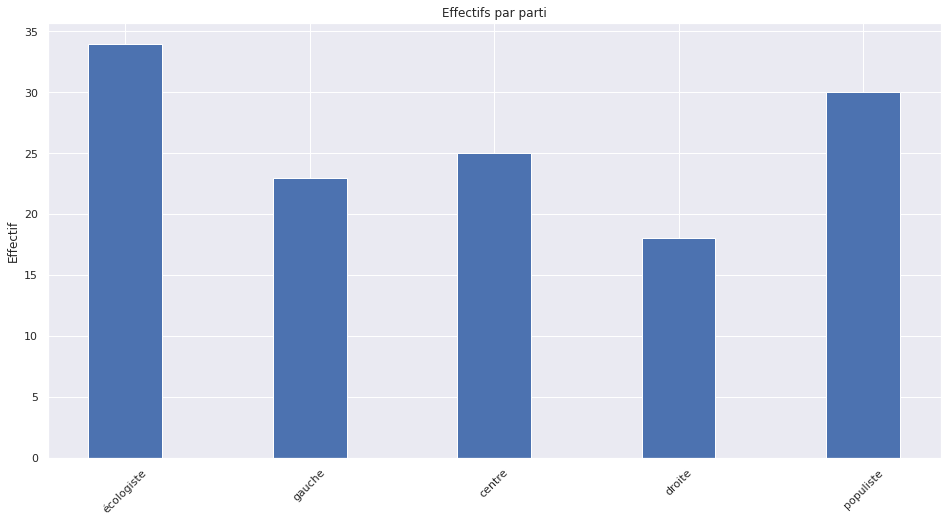

In [49]:
# Distribution par parti: représentation par diagramme à barres

objects = [l for l in df_partis['parti']]
eff = [l for l in df_partis['effectif']]

objects = [l for l in df_partis.sort_values('code_parti')['parti']]
eff = [l for l in df_partis.sort_values('code_parti')['effectif']]


p1 = plt.bar(objects, eff, width=0.4)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title('Effectifs par parti')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


### Fréquence de lecture d'un journal

In [50]:
### Regrouper et compter par fréquence de lecture du journal (variable qualitative)
gb_lecture_journal = obs.groupby('lecture_journal').size()
sgb_lecture_journal = gb_lecture_journal.sort_values(ascending = False)
sgb_lecture_journal

lecture_journal
trois-quatre fois par semaine    35
très rarement                    30
le week-end                      29
tous les jours                   19
de temps en temps                17
dtype: int64

In [51]:
## Le code permet un tri dans l'ordre de la fréquence de cette variable 
#  qui en fait est une variable qualitative ordonnée
df_lecture_journal = pd.DataFrame(sgb_lecture_journal)
df_lecture_journal.reset_index(inplace=True)
df_lecture_journal.columns = ['lecture','effectif']
df_lecture_journal['code_lecture'] = [4,1,3,5,2]
df_lecture_journal

,lecture,effectif,code_lecture
0,trois-quatre fois par semaine,35,4
1,très rarement,30,1
2,le week-end,29,3
3,tous les jours,19,5
4,de temps en temps,17,2


In [52]:
df_lecture_journal.sort_values('code_lecture', inplace=True)
list(df_lecture_journal['lecture'])

['très rarement',
 'de temps en temps',
 'le week-end',
 'trois-quatre fois par semaine',
 'tous les jours']

In [53]:
df_lecture_journal['effectif_cumule'] = df_lecture_journal['effectif'].cumsum()
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule
1,très rarement,30,1,30
4,de temps en temps,17,2,47
2,le week-end,29,3,76
0,trois-quatre fois par semaine,35,4,111
3,tous les jours,19,5,130


In [54]:
df_lecture_journal['frequence'] = (100 * df_lecture_journal['effectif'] \
                                   / df_lecture_journal['effectif'].sum()).round(2)
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule,frequence
1,très rarement,30,1,30,23.08
4,de temps en temps,17,2,47,13.08
2,le week-end,29,3,76,22.31
0,trois-quatre fois par semaine,35,4,111,26.92
3,tous les jours,19,5,130,14.62


In [55]:
### Fréquence cumulée calculée en utilisant les effectifs cumulés

df_lecture_journal['frequence_cumulee'] = (100 * df_lecture_journal['effectif_cumule'] \
                                / df_lecture_journal['effectif'].sum()).round(2)
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule,frequence,frequence_cumulee
1,très rarement,30,1,30,23.08,23.08
4,de temps en temps,17,2,47,13.08,36.15
2,le week-end,29,3,76,22.31,58.46
0,trois-quatre fois par semaine,35,4,111,26.92,85.38
3,tous les jours,19,5,130,14.62,100.00


In [56]:
### Fréquence cumulée calculée directement

# Cf. https://www.geeksforgeeks.org/cumulative-percentage-of-a-column-in-pandas-python/

df_lecture_journal['frequence_cumulee'] = (100 * df_lecture_journal['effectif'].cumsum() \
                                / df_lecture_journal['effectif'].sum()).round(2)
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule,frequence,frequence_cumulee
1,très rarement,30,1,30,23.08,23.08
4,de temps en temps,17,2,47,13.08,36.15
2,le week-end,29,3,76,22.31,58.46
0,trois-quatre fois par semaine,35,4,111,26.92,85.38
3,tous les jours,19,5,130,14.62,100.00


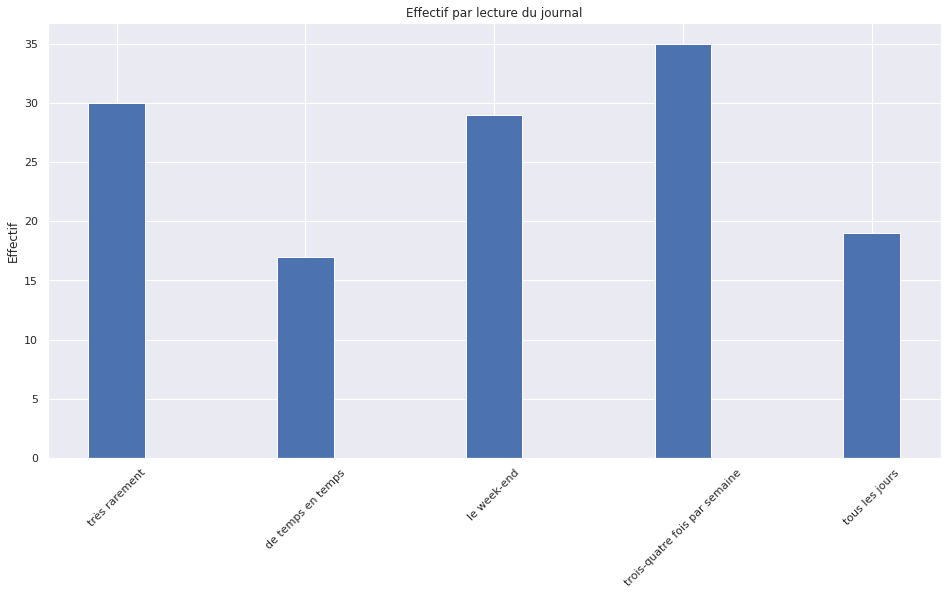

In [57]:
# Distribution par lecture journal

objects = [l for l in sgb_lecture_journal.index]
eff = [l for l in sgb_lecture_journal.values]


objects = [l for l in df_lecture_journal.sort_values('code_lecture')['lecture']]
eff = [l for l in df_lecture_journal.sort_values('code_lecture')['effectif']]

p1 = plt.bar(objects, eff, width=0.3)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title('Effectif par lecture du journal')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


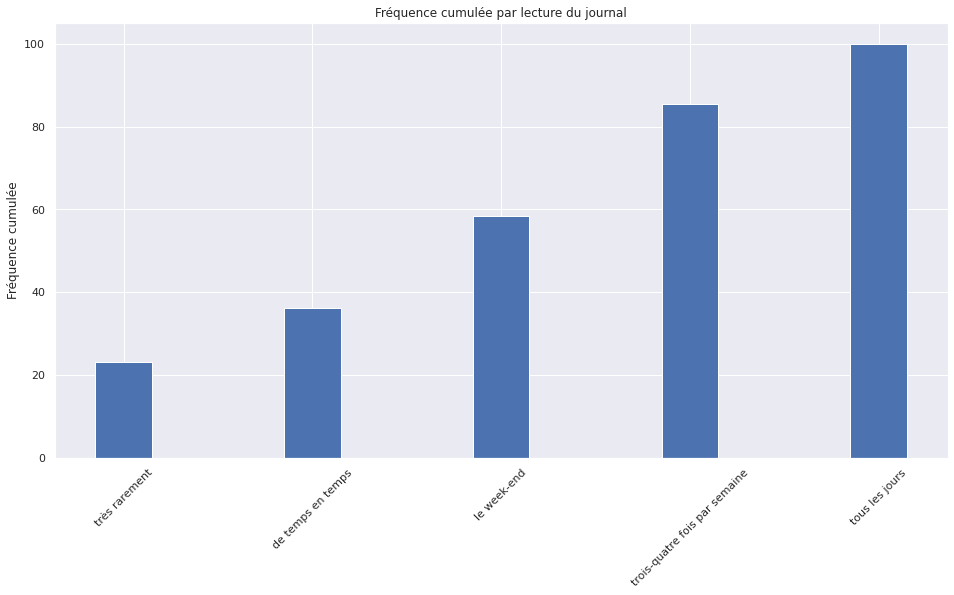

In [58]:
# Distribution par lecture journal: fréquence cumulée

objects = [l for l in sgb_lecture_journal.index]
eff = [l for l in sgb_lecture_journal.values]


objects = [l for l in df_lecture_journal['lecture']]
eff = [l for l in df_lecture_journal['frequence_cumulee']]

p1 = plt.bar(objects, eff, width=0.3)

#plt.xticks(l5Years)
plt.ylabel('Fréquence cumulée')
plt.title('Fréquence cumulée par lecture du journal')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


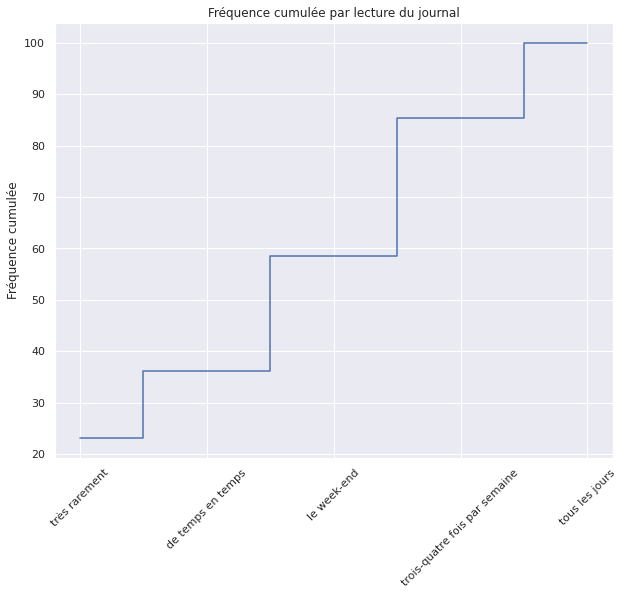

In [59]:
### Distribution par lecture journal: fréquence cumulée
# Diagramme par paliers plus lisible

objects = [l for l in sgb_lecture_journal.index]
eff = [l for l in sgb_lecture_journal.values]


objects = [l for l in df_lecture_journal['lecture']]
eff = [l for l in df_lecture_journal['frequence_cumulee']]

p1 = plt.plot(objects, eff, drawstyle='steps-mid') # autre valeur: steps-post, steps

plt.ylabel('Fréquence cumulée')
plt.title('Fréquence cumulée par lecture du journal')
plt.gcf().set_size_inches(10, 8)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


In [60]:
###  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
obs['lecture_journal_codes'] = obs['lecture_journal']\
    .replace(['très rarement','de temps en temps','le week-end','trois-quatre fois par semaine','tous les jours'],[1,2,3,4,5])
obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel,lecture_journal_codes
id,,,,,,
1,44,3,de temps en temps,droite,9660,2
2,45,1,tous les jours,droite,7364,5
3,54,3,de temps en temps,droite,8947,2
4,86,2,tous les jours,populiste,6317,5
5,77,2,tous les jours,gauche,6511,5


(1.0, 5.0)

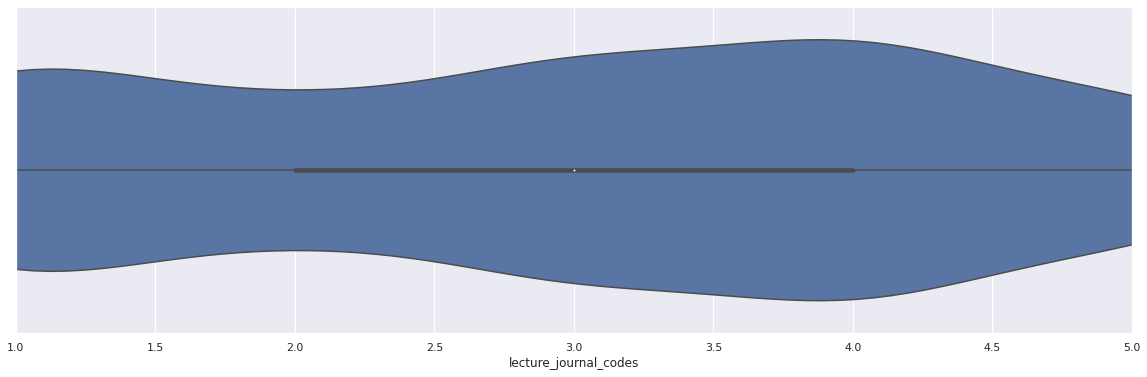

In [61]:
### Ce violin plot n'a pas beaucoup de sens et en doit pas être utilisé ! 
#  car les densitées des points intermédiaires (qui n'existent pas) sont trompeuses
# Adapté pour les variables continues, le violin plot ne l'est pas pour les 
# variables ordonnées comme dans le cas présent

sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(20, 6)})

l = obs["lecture_journal_codes"]

ax = sns.violinplot(x=l)
ax.set_xlim(left=min(l), right=max(l))

